# Morphological Operations - Big Picture
Using a structuring element/kernel(a matrix) to manipulate an image to extract information about the shape and structure of an object.

# Types of Morphological Operations
1) **Erosion** -  Shrinking an object
2) **Dilation** - Expanding an object
3) **Opening(Erosion followed by Dilation** - For removing noise
4) **Closing(Dilation followed by Erosion)** - Filling gaps in an object

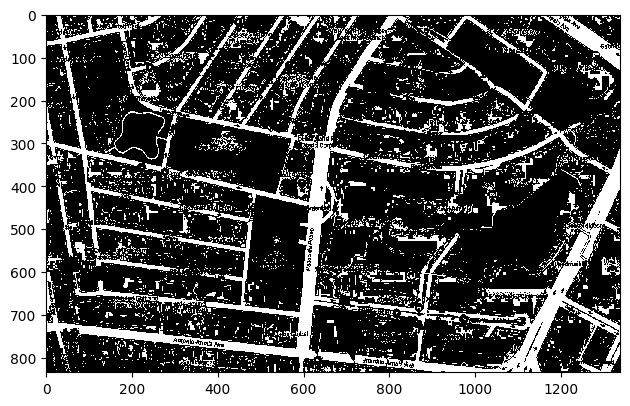

In [1]:
from skimage.color import rgb2gray
from skimage.io import imread, imshow
import numpy as np

image_raw = imread('map.jpg')
img = rgb2gray(image_raw[:, :, :3])
img_bw = img > 0.973
imshow(img_bw)

In [2]:
from skimage.morphology import erosion, dilation, opening, closing

def img_erosion(image, kernel, n):
    for i in range(n):
        image = erosion(image, kernel)
    return image

def img_dilation(image, kernel, n):
    for i in range(n):
        image = dilation(image, kernel)
    return image

def img_opening(image, kernel, n):
    for i in range(n):
        image = opening(image, kernel)
    return image

def img_closing(image, kernel, n):
    for i in range(n):
        image = closing(image, kernel)
    return image

## Isolating Roads

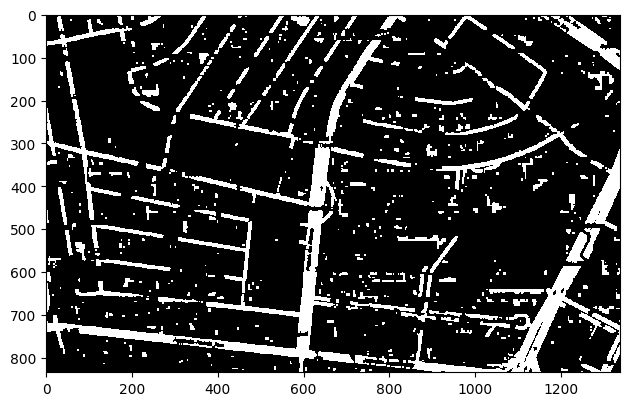

In [3]:
# Perform opening to remove non-road structures that come from labels and etc.

kernel = np.array([[-1, -1, -1, -1],
                    [-1, 8.5, 8.5, -1],
                    [-1, 8.5, 8.5, -1],
                    [-1, -1, -1, -1]])

img_t1 = img_opening(img_bw, kernel, 1)
imshow(img_t1)

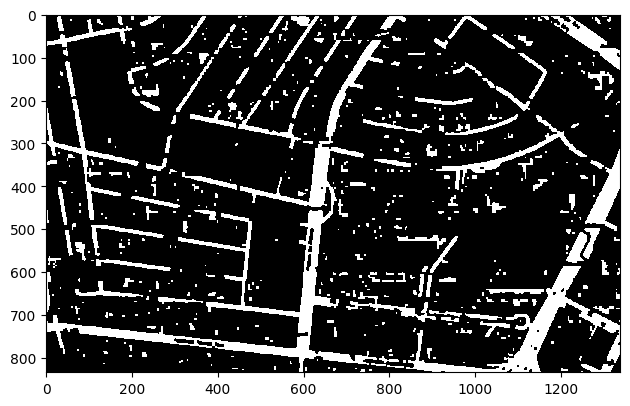

In [4]:
# Perform closing to connect road patches

img_t2 = img_closing(img_t1, kernel, 1)
imshow(img_t2)

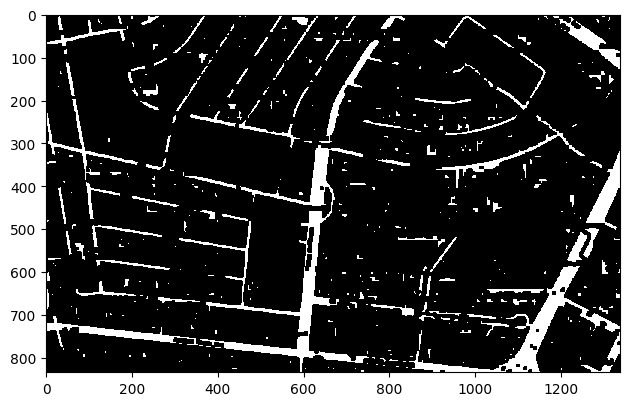

In [5]:
# There are still non-roads present. Perform a erosion to fix this

img_t3 = img_erosion(img_t2, kernel, 1)
imshow(img_t3)

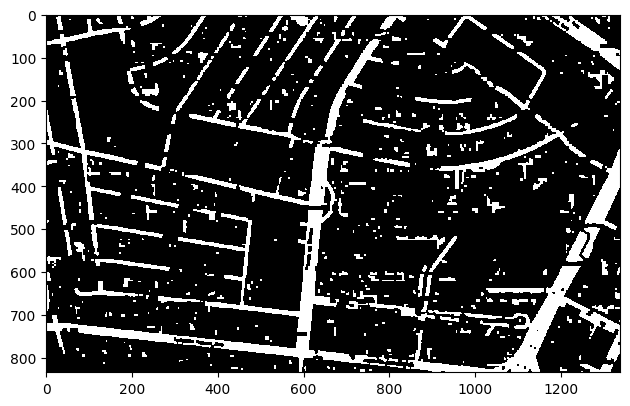

In [6]:
# There are still gaps, perform dilation to fix this.

img_t4 = img_dilation(img_t3, kernel, 1)
imshow(img_t4)